https://github.com/lena6612/DeepLearningBasic/blob/master/code/Lab11_1_CAT_DOG_classification_Keras%20_dataAugmentation.ipynb


https://github.com/lena6612/DeepLearningBasic/blob/master/code/Lab10_3_mnist_CNN_Keras-BN.ipynb

https://github.com/lena6612/DeepLearningBasic/blob/master/code/Lab11_2_CIFAR10_cnn.ipynb

In [ ]:
# 기본 Library 선언 및 Tensorflow 버전 확인
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from keras.constraints import maxnorm
from keras.utils import to_categorical
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Input, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Data Load

In [ ]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()    

print("cifar10 train : ", train_images.shape)
print("cifar10 test  : ", test_images.shape)

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# 변수 설정

In [ ]:
# hyper parameter
learning_rate = 0.01
epochs = 20
batch_size = 200

IMG_HEIGHT = 32
IMG_WIDTH = 32

# One-Hot Encoding

In [ ]:
train_x = train_images
test_x = test_images
train_y = to_categorical(train_labels)
test_y = to_categorical(test_labels)

## train 10000, test 1000 개만으로 test
#train_x = train_x[:10000]
#test_x = test_x[:1000]
#train_y = train_y[:10000]
#test_y = test_y[:1000]

print("train : ", train_x.shape)
print("test  : ", test_y.shape)

# Model_1

In [ ]:
def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = deep_cnn()
model.summary()

In [ ]:
#Train the model
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=128)

loss, acc = model.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

plot_history(history)
model.save('model1.h5')

# Model_2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

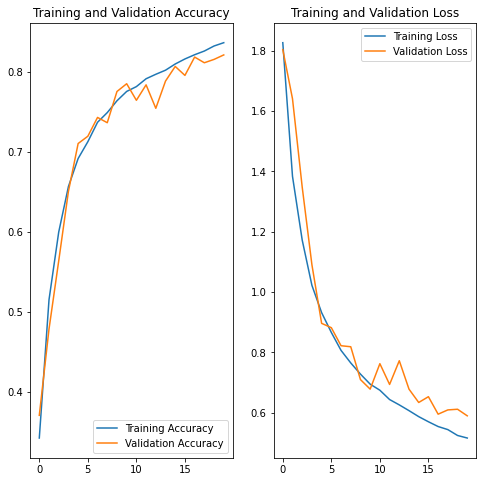

In [ ]:
model1 = Sequential([
    Conv2D(input_shape = (train_x.shape[1], train_x.shape[2], train_x.shape[3]), filters = 32, kernel_size = (3,3), padding = 'same', activation='relu',
           kernel_initializer='he_normal', kernel_regularizer = regularizers.l2(0.001)),
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_normal'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_normal'),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_normal'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation='relu'),
    BatchNormalization(),
    
    
    MaxPooling2D(),
    Dropout(0.35),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu'),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu'),
    MaxPooling2D(),
    BatchNormalization(),

    Flatten(),
    Dropout(0.3),
    Dense(1024, activation = 'relu', kernel_constraint=maxnorm(3)),
    Dropout(0.3),
    Dense(512, activation = 'relu', kernel_constraint=maxnorm(3)),
    Dense(1024, activation = 'relu', kernel_constraint=maxnorm(3)),
    Dropout(0.4),
    Dense(10, activation = 'softmax')
])


adam = optimizers.Adam(lr = 0.001)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])



model1.summary()

#Train the model
history = model1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=128)

loss, acc = model1.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

plot_history(history)
model1.save('model2.h5')

# Model_3

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)       

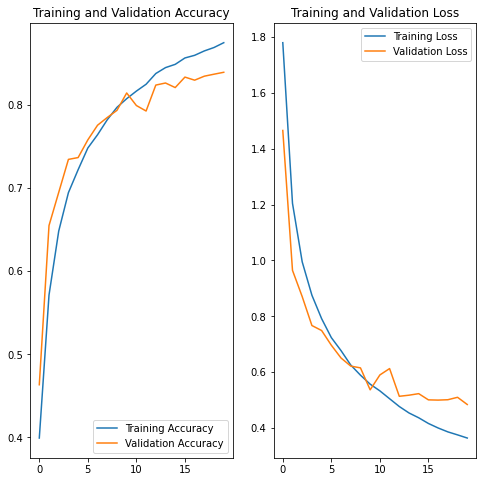

In [ ]:
model1 = Sequential([
    Conv2D(input_shape = (32, 32, 3), filters = 32, kernel_size = 3, padding = 'same', activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),
    
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu',kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
 
    Dense(128, activation = 'relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])


adam = optimizers.Adam(lr = 0.001)
model1.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

model1.summary()

#Train the model
history = model1.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=128)

loss, acc = model1.evaluate(test_x, test_y,verbose=0)
print("loss=",loss)
print("acc=",acc)

plot_history(history)
model1.save('model3.h5')

# 성능 비교

In [ ]:
model_1 = tf.keras.models.load_model('model1.h5')
model_2 = tf.keras.models.load_model('model2.h5')
model_3 = tf.keras.models.load_model('model3.h5')

score1 = model_1.evaluate(test_x, test_y, batch_size=1)
print(f"Model 1 : Test Accuracy: {score1[1]*100}")
score2= model_2.evaluate(test_x, test_y, batch_size=1)
print(f"Model 2 : Test Accuracy: {score2[1]*100}")
score3 = model_3.evaluate(test_x, test_y, batch_size=1)
print(f"Model 3 : Test Accuracy: {score3[1]*100}")

10000/10000 [==============================] - 34s 3ms/step - loss: 0.6168 - accuracy: 0.7979
Model 1 : Test Accuracy: 79.79000210762024
10000/10000 [==============================] - 39s 4ms/step - loss: 0.5894 - accuracy: 0.8210
Model 2 : Test Accuracy: 82.09999799728394
10000/10000 [==============================] - 36s 4ms/step - loss: 0.4841 - accuracy: 0.8392
Model 3 : Test Accuracy: 83.92000198364258


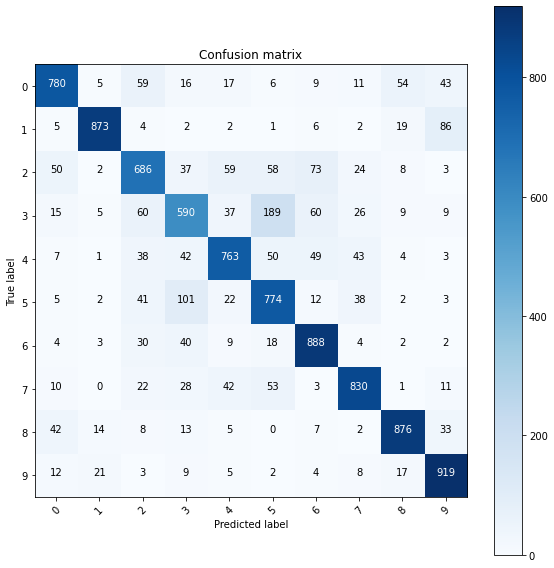

In [ ]:
# Predict the values from the validation dataset
Y_pred = model_1.predict(test_x)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

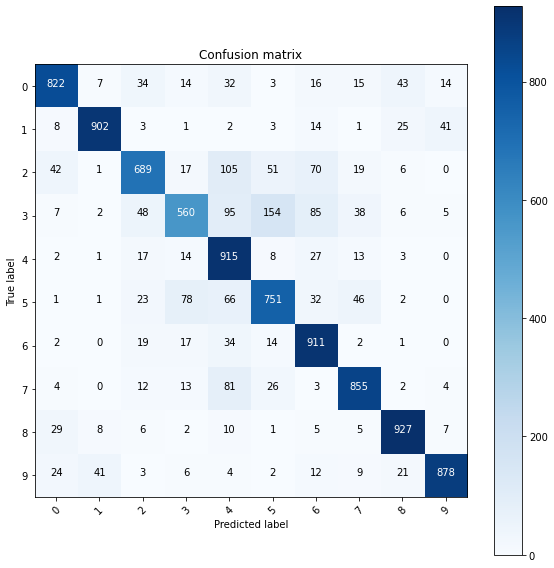

In [ ]:
Y_pred = model_2.predict(test_x)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

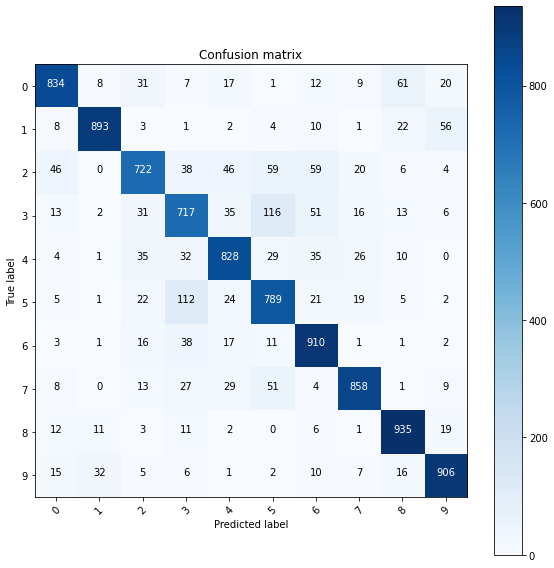

In [ ]:
Y_pred = model_3.predict(test_x)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y, axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))